In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# データ読み込み（get_video_data.pyで作成したExcelファイル）
df = pd.read_excel("youtube_dataset_20250605.xlsx")

# 欠損補完
df["title"] = df["title"].fillna("")
df["categoryId"] = pd.to_numeric(df["categoryId"], errors='coerce').fillna(-1).astype(int)
df["viewCount"] = pd.to_numeric(df["viewCount"], errors='coerce').fillna(0)

# TF-IDF（100次元）
vectorizer = TfidfVectorizer(max_features=100)
tfidf_matrix = vectorizer.fit_transform(df["title"]).toarray()
tfidf_df = pd.DataFrame(tfidf_matrix, columns=[f"tfidf_{t}" for t in vectorizer.get_feature_names_out()])

# 入力X, 出力y（log変換）
X = pd.concat([df[["categoryId"]].reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)
y = np.log1p(df["viewCount"])


RMSE（logスケール）: 1.2244


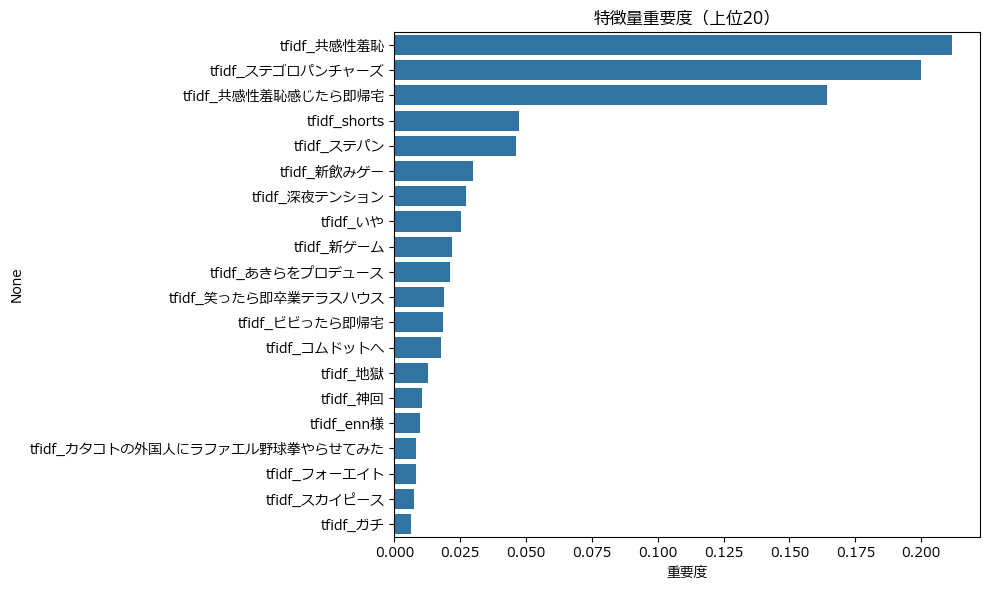

In [5]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 日本語フォントを明示的に指定（例：MS Gothic、Meiryo、IPAexGothicなど）
plt.rcParams['font.family'] = 'Meiryo'  # または 'MS Gothic', 'IPAexGothic', 'Noto Sans CJK JP'
# 学習データ分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# モデル構築
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# 評価
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
print(f"RMSE（logスケール）: {rmse:.4f}")

# 特徴量重要度
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# 上位20を可視化
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[:20], y=feature_importance.index[:20])
plt.title("特徴量重要度（上位20）")
plt.xlabel("重要度")
plt.tight_layout()
plt.show()
